In [3]:
# ZAD 3B
# https://en.wikipedia.org/wiki/Newton_fractal

using Images

fn(z) = z^6 - 1 
fn_der(z) = 6z^5
roots = [
    (1 + 0im),
    (1/2 + sqrt(3)/2im),
    (-1/2 + sqrt(3)/2im),
    (-1 + 0im),
    (-1/2 - sqrt(3)/2im),
    (1/2 - sqrt(3)/2im)]


imagew = 512
imageh = 512
maxIteration = 200
tolerance = 0.000001;
znextfun = z -> z - (fn(z) / fn_der(z))


#3 (generic function with 1 method)

In [8]:
function color_fun(iteration, root_num)
    maxIteration_ = 50
    iteration = clamp(iteration, 1, maxIteration_)
    if(root_num == 1) return RGB(1 - iteration/maxIteration_,0,0) end
    if(root_num == 2) return RGB(0,1 - iteration/maxIteration_,0) end
    if(root_num == 3) return RGB(0,0,1 - iteration/maxIteration_) end
    if(root_num == 4) return RGB(1-iteration/maxIteration_,1-iteration/maxIteration_,0) end
    if(root_num == 5) return RGB(0,1-iteration/maxIteration_,1-iteration/maxIteration_) end
    if(root_num == 6) return RGB(1-iteration/maxIteration_,0,1-iteration/maxIteration_) end
    return RGB(0,0,0)
end    

color_fun (generic function with 1 method)

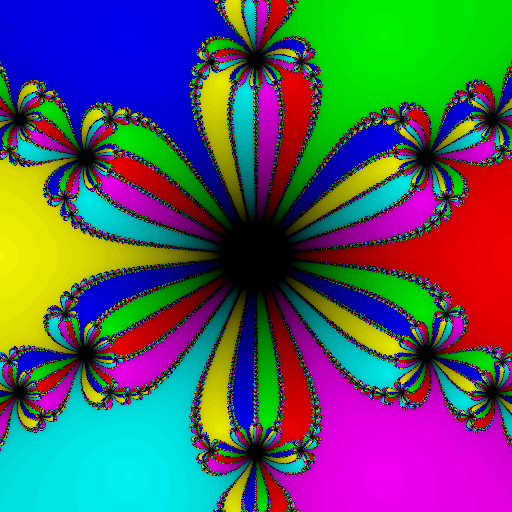

In [9]:
function get_color(x, y, znextfun)
    zx = -1 + 2  * ((x-1) / (imagew-1))
    zy = -1 + 2 * ((y-1) / (imageh-1))
    z = zx + zy * im
    for iteration in 1:maxIteration
        z = znextfun(z)
        for j=1:length(roots)
            difference = z - roots[j]
            if abs(difference.re) < tolerance && abs(difference.im) < tolerance
                return color_fun(iteration,j)
            end
        end
    end        
    return color_fun(0,0)
end

image = zeros(RGB, 512 ,512)
for x=1:imagew
    for y=1:imageh
       image[y,x] = get_color(x,y, znextfun)
    end
end

image